<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>CATBoost - Classification</strong></p> 

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [6]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [7]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.loc[336, "sex"] = "MALE"

In [10]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

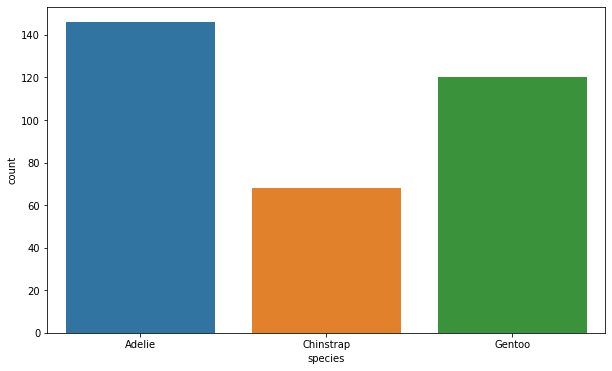

In [11]:
sns.countplot(x="species", data = df);

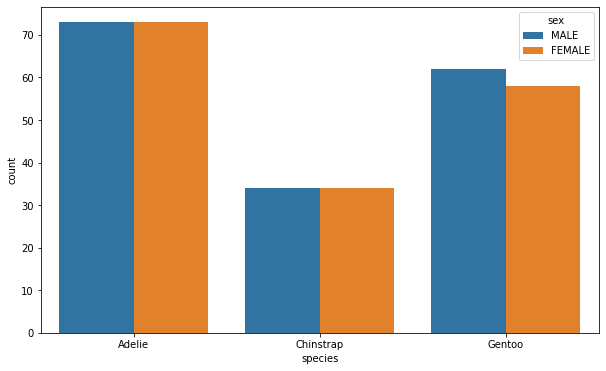

In [12]:
sns.countplot(x="species", data = df, hue = "sex");

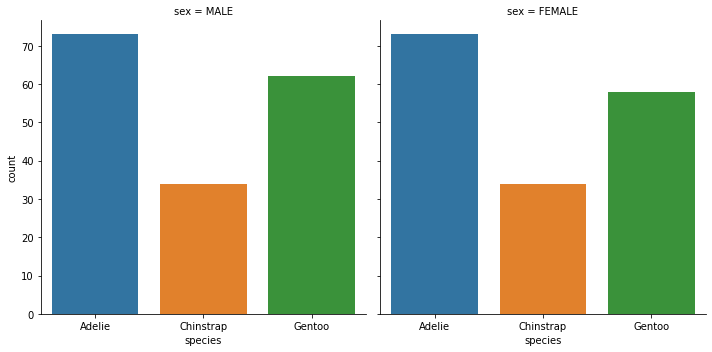

In [13]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

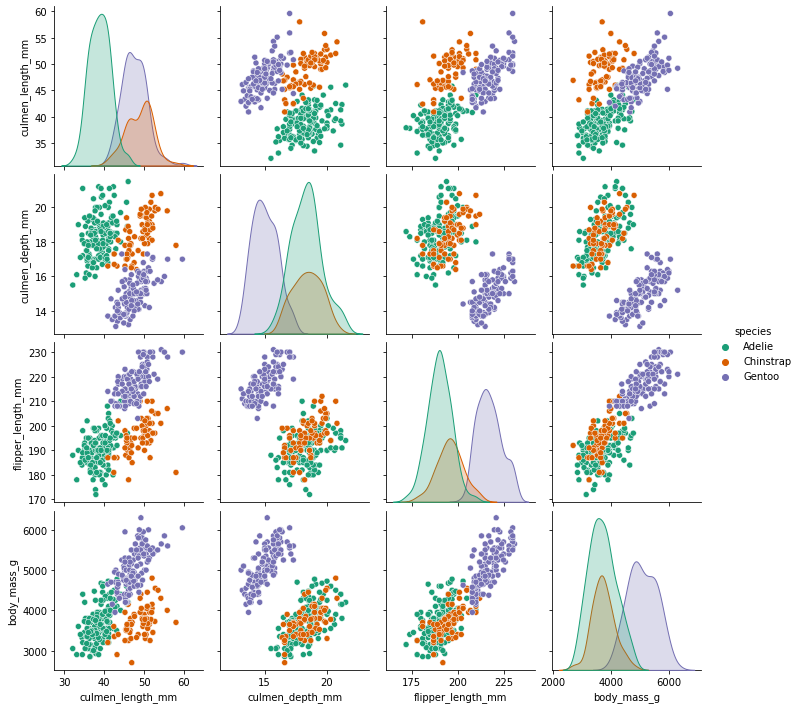

In [14]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [15]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


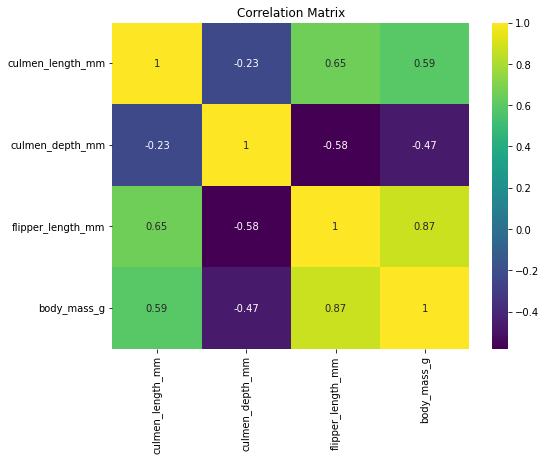

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## <span style='color:red'> CatBoost MultiClass Modelling</span> 

In [102]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, cv, Pool
from sklearn.metrics import confusion_matrix,classification_report

In [103]:
X = df.drop('species',axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

In [104]:
cat_cols = ["island","sex"]
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)

eval_pool = Pool(data=X_test, label=y_test,cat_features=cat_cols)
model = CatBoostClassifier(iterations=10000, early_stopping_rounds=1500, 
                            loss_function='MultiClass', random_seed=42,
                            auto_class_weights='Balanced')# For multiclass
model.fit(train_pool, eval_set=eval_pool,plot=True, verbose=100)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.043519
0:	learn: 1.0494660	test: 1.0511712	best: 1.0511712 (0)	total: 7.01ms	remaining: 1m 10s
100:	learn: 0.0915747	test: 0.0851725	best: 0.0851725 (100)	total: 320ms	remaining: 31.4s
200:	learn: 0.0357072	test: 0.0438766	best: 0.0438766 (200)	total: 553ms	remaining: 27s
300:	learn: 0.0204305	test: 0.0356781	best: 0.0356447 (298)	total: 790ms	remaining: 25.4s
400:	learn: 0.0142240	test: 0.0341038	best: 0.0341035 (395)	total: 1.03s	remaining: 24.6s
500:	learn: 0.0108279	test: 0.0335698	best: 0.0333733 (488)	total: 1.25s	remaining: 23.7s
600:	learn: 0.0087839	test: 0.0337828	best: 0.0333733 (488)	total: 1.53s	remaining: 23.9s
700:	learn: 0.0073256	test: 0.0345398	best: 0.0333733 (488)	total: 2.04s	remaining: 27.1s
800:	learn: 0.0062636	test: 0.0347869	best: 0.0333733 (488)	total: 2.26s	remaining: 26s
900:	learn: 0.0054561	test: 0.0356612	best: 0.0333733 (488)	total: 2.8s	remaining: 28.3s
1000:	learn: 0.0048531	test: 0.0371125	best: 0.0333733 (488)	total: 3.16s	rem

In [105]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[43  0  1]
 [ 1 20  0]
 [ 0  0 36]]
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        44
   Chinstrap       1.00      0.95      0.98        21
      Gentoo       0.97      1.00      0.99        36

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[102   0   0]
 [  0  47   0]
 [  0   0  84]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       102
   Chinstrap       1.00      1.00      1.00        47
      Gentoo       1.00      1.00      1.00        84

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [106]:
print("  TRAINING STAGE\n",np.array(model.get_feature_importance(train_pool, prettified=True)))

  TRAINING STAGE
 [['culmen_length_mm' 55.00685253401979]
 ['island' 24.66780113603108]
 ['culmen_depth_mm' 9.581996738343632]
 ['flipper_length_mm' 4.414773662807048]
 ['body_mass_g' 4.160715128847445]
 ['sex' 2.167860799950977]]


<AxesSubplot:>

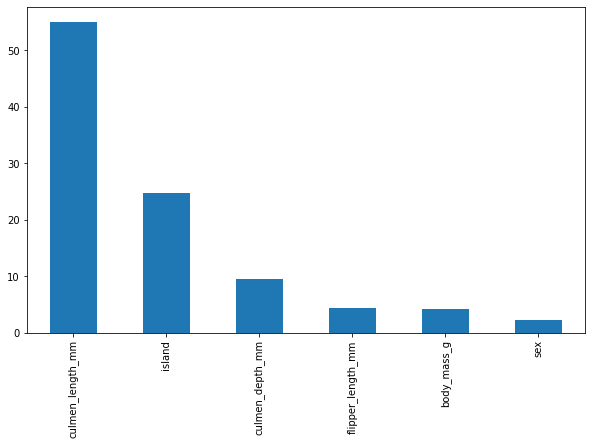

In [107]:
feature_imp = pd.Series(model.feature_importances_, index= X_train.columns)
feature_imp.nlargest(20).plot(kind='bar')

## <span style='color:red'> CatBoost Binary Class Modelling</span> 

In [108]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, cv, Pool
from sklearn.metrics import confusion_matrix,classification_report

In [109]:
X = df.drop('sex',axis=1)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

In [110]:
cat_cols = ["island","species"]
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)

eval_pool = Pool(data=X_test, label=y_test,cat_features=cat_cols)
model = CatBoostClassifier(iterations=10000, early_stopping_rounds=500, 
                            eval_metric="F1", random_seed=42,
                            auto_class_weights='Balanced')#for binary class

model.fit(train_pool, eval_set=eval_pool,plot=True, verbose=100)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.008122
0:	learn: 0.8510224	test: 0.8560035	best: 0.8560035 (0)	total: 3.42ms	remaining: 34.2s
100:	learn: 0.9403519	test: 0.9422368	best: 0.9422368 (66)	total: 287ms	remaining: 28.1s
200:	learn: 0.9529571	test: 0.9422368	best: 0.9422368 (66)	total: 592ms	remaining: 28.9s
300:	learn: 0.9614962	test: 0.9321754	best: 0.9422368 (66)	total: 796ms	remaining: 25.7s
400:	learn: 0.9656747	test: 0.9321754	best: 0.9422368 (66)	total: 1.13s	remaining: 27.1s
500:	learn: 0.9743627	test: 0.9219207	best: 0.9422368 (66)	total: 1.63s	remaining: 31s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9422367895
bestIteration = 66

Shrink model to first 67 iterations.


In [111]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[45  5]
 [ 1 50]]
              precision    recall  f1-score   support

      FEMALE       0.98      0.90      0.94        50
        MALE       0.91      0.98      0.94        51

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101


Train_Set
[[108   7]
 [ 10 108]]
              precision    recall  f1-score   support

      FEMALE       0.92      0.94      0.93       115
        MALE       0.94      0.92      0.93       118

    accuracy                           0.93       233
   macro avg       0.93      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233



In [112]:
print("  TRAINING STAGE\n",np.array(model.get_feature_importance(train_pool, prettified=True)))

  TRAINING STAGE
 [['culmen_depth_mm' 41.53219026928678]
 ['body_mass_g' 39.5455614396328]
 ['culmen_length_mm' 11.928344084191227]
 ['flipper_length_mm' 3.771139757728629]
 ['species' 2.2557550644210673]
 ['island' 0.9670093847395026]]


<AxesSubplot:>

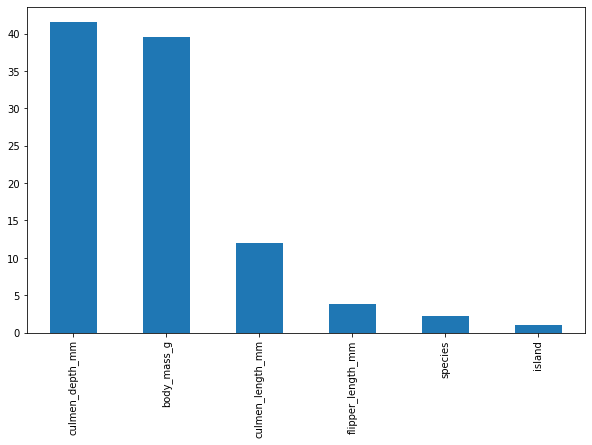

In [113]:
feature_imp = pd.Series(model.feature_importances_, index= X_train.columns)
feature_imp.nlargest(20).plot(kind='bar')